Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


 **Importing Skin Cancer Data**

**To do: Take necessary actions to read the data**

**Importing all the important libraries**

In [23]:

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [25]:
from glob import glob

**Using the data by mounting the google drive**

In [56]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


 **Defining the path for train and test images**

In [58]:
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [32]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


2239
118


**Load using keras.preprocessing**

Let's load these images off disk using the helpful image_dataset_from_directory utility.

**Create a dataset**

Define some parameters for the loader:

In [33]:
batch_size = 32
img_height = 180
img_width = 180


**Train dataset**

In [34]:

train_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir_train,
            batch_size=batch_size,
            image_size=(img_height, img_width),
            seed=123,
            validation_split=0.2,
            subset='training',
            )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


**validation dataset**

In [35]:

val_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir_train,
            batch_size=batch_size,
            image_size=(img_height, img_width),
            seed=123,
            validation_split=0.2,
            subset='validation',
            )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


List out all the classes of skin cancer and store them in a list.

You can find the class names in the class_names attribute on these datasets.

These correspond to the directory names in alphabetical order.

In [36]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### **Visualize the data**

**creating a code to visualize one instance of all the nine classes present in the dataset**

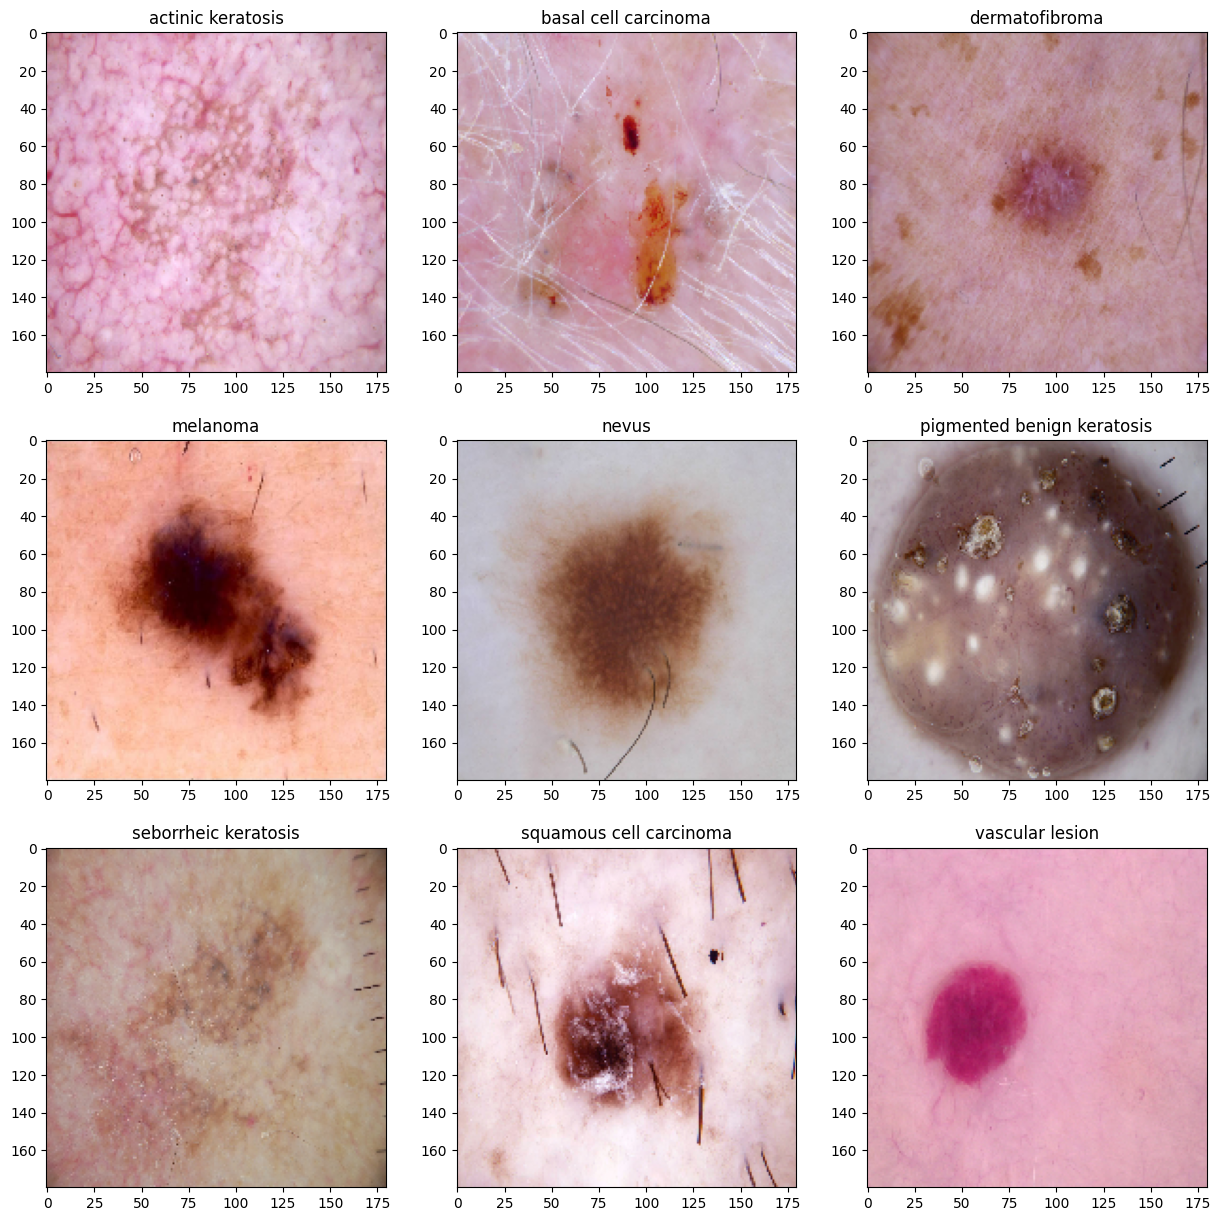

In [37]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(img_height,img_width)))
    plt.title(c)

In [38]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### **Creating the model**

Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

The Sequence class in Keras assists in forming a linearly stacked cluster of layers, which is incorporated into a tf.keras.Model.

In [39]:
num_class = 9
model = tf.keras.Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2),
    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2),
    layers.Conv2D(128,3,padding='same',activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(num_class, activation='softmax')
])

### **Compile the model**

Choose an appropirate optimiser and loss function for model training

In [40]:
# choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [41]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                   

**Train the model**

In [42]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 440s 4s/step - loss: 2.8929 - accuracy: 0.1858 - val_loss: 2.0708 - val_accuracy: 0.2036
Epoch 2/20
56/56 [==============================] - 147s 3s/step - loss: 2.0248 - accuracy: 0.2076 - val_loss: 2.0310 - val_accuracy: 0.2528
Epoch 3/20
56/56 [==============================] - 145s 3s/step - loss: 1.9072 - accuracy: 0.2913 - val_loss: 1.8604 - val_accuracy: 0.2573
Epoch 4/20
56/56 [==============================] - 161s 3s/step - loss: 1.6654 - accuracy: 0.4012 - val_loss: 1.6365 - val_accuracy: 0.4139
Epoch 5/20
56/56 [==============================] - 160s 3s/step - loss: 1.4946 - accuracy: 0.4860 - val_loss: 1.5233 - val_accuracy: 0.4810
Epoch 6/20
56/56 [==============================] - 148s 3s/step - loss: 1.3473 - accuracy: 0.5312 - val_loss: 1.4227 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 161s 3s/step - loss: 1.2674 - accuracy: 0.5452 - val_loss: 1.4478 - val_accuracy: 0.5056
Epoch 8/20
56/56 [======

**Visualizing training results**

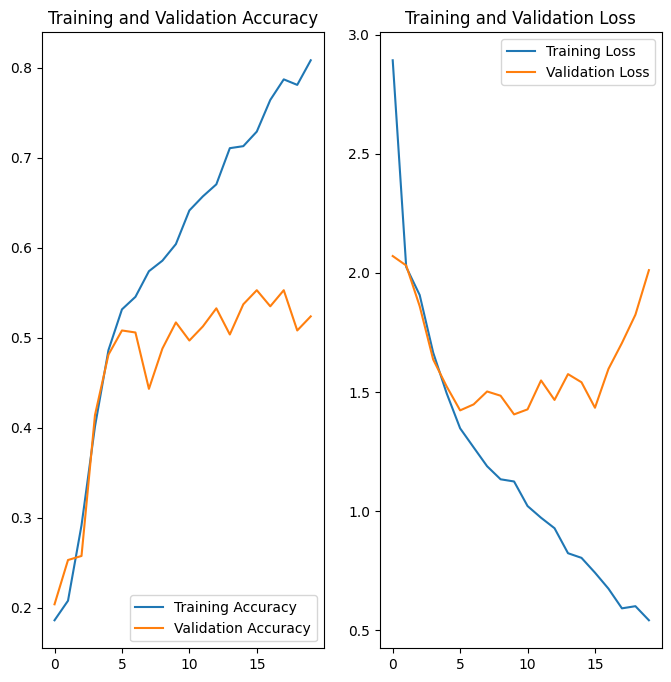

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings**: The model appears to be overfitting

The training accuracy is significantly higher than the validation accuracy, which hovers around 50%.

The model’s performance on the validation set is deteriorating.


In [45]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(height_factor=(-0.1,0.1), width_factor=(-0.1,0.1))
])


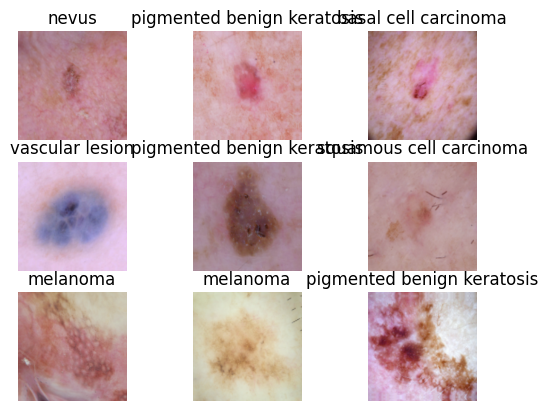

In [46]:
# visualize how your augmentation strategy works for one instance of training image.
for img, labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(data_augmentation(img)[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Creating the model, compile and train the model**

In [47]:

num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

**Compiling the model**

In [48]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

**Training the model**

In [50]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
  )

Epoch 1/20
56/56 [==============================] - 71s 1s/step - loss: 1.9998 - accuracy: 0.2483 - val_loss: 1.8158 - val_accuracy: 0.3982
Epoch 2/20
56/56 [==============================] - 69s 1s/step - loss: 1.7711 - accuracy: 0.3482 - val_loss: 1.6960 - val_accuracy: 0.4139
Epoch 3/20
56/56 [==============================] - 66s 1s/step - loss: 1.5819 - accuracy: 0.4464 - val_loss: 1.4899 - val_accuracy: 0.4966
Epoch 4/20
56/56 [==============================] - 69s 1s/step - loss: 1.4803 - accuracy: 0.4877 - val_loss: 1.4333 - val_accuracy: 0.5101
Epoch 5/20
56/56 [==============================] - 68s 1s/step - loss: 1.4556 - accuracy: 0.5078 - val_loss: 1.3700 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 67s 1s/step - loss: 1.3943 - accuracy: 0.5011 - val_loss: 1.3748 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 68s 1s/step - loss: 1.3509 - accuracy: 0.5240 - val_loss: 1.3245 - val_accuracy: 0.5414
Epoch 8/20
56/56 [==

**Visualizing the results**

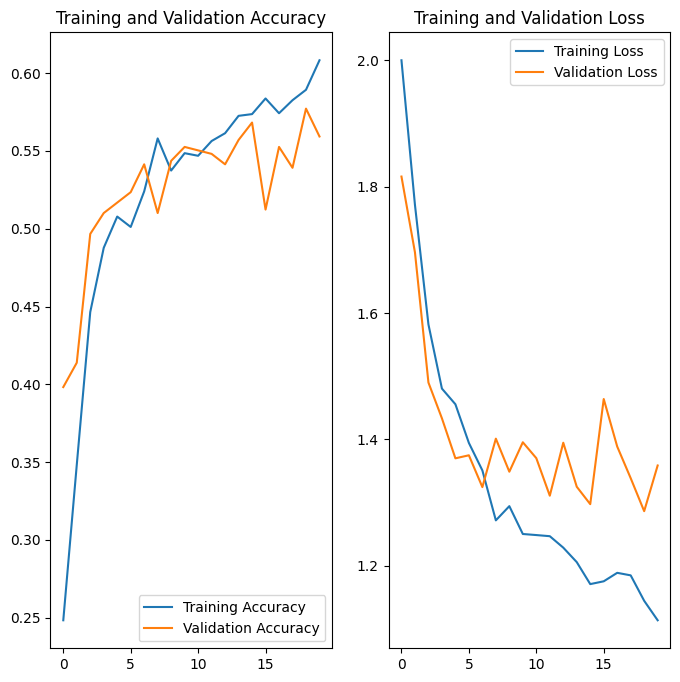

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**Findings**:-
Using data augmentation and dropout layer reduced the problem of overfitting.



**Todo:** Find the distribution of classes in the training dataset.

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [52]:
## Your code goes here.
## original_df - > path_list, lesion_list
path_list=[]
lesion_list=[]

In [59]:
path_list = [str(j) for i in class_names for j in data_dir_train.glob(i+'/*.jpg')]
lesion_list = [i for i in class_names for _ in data_dir_train.glob(i+'/*.jpg')]

original_df = pd.DataFrame({'Path': path_list, 'Label': lesion_list})

In [60]:
original_df

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2235,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2236,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion
2237,/content/gdrive/MyDrive/Skin cancer ISIC The I...,vascular lesion


<BarContainer object of 9 artists>

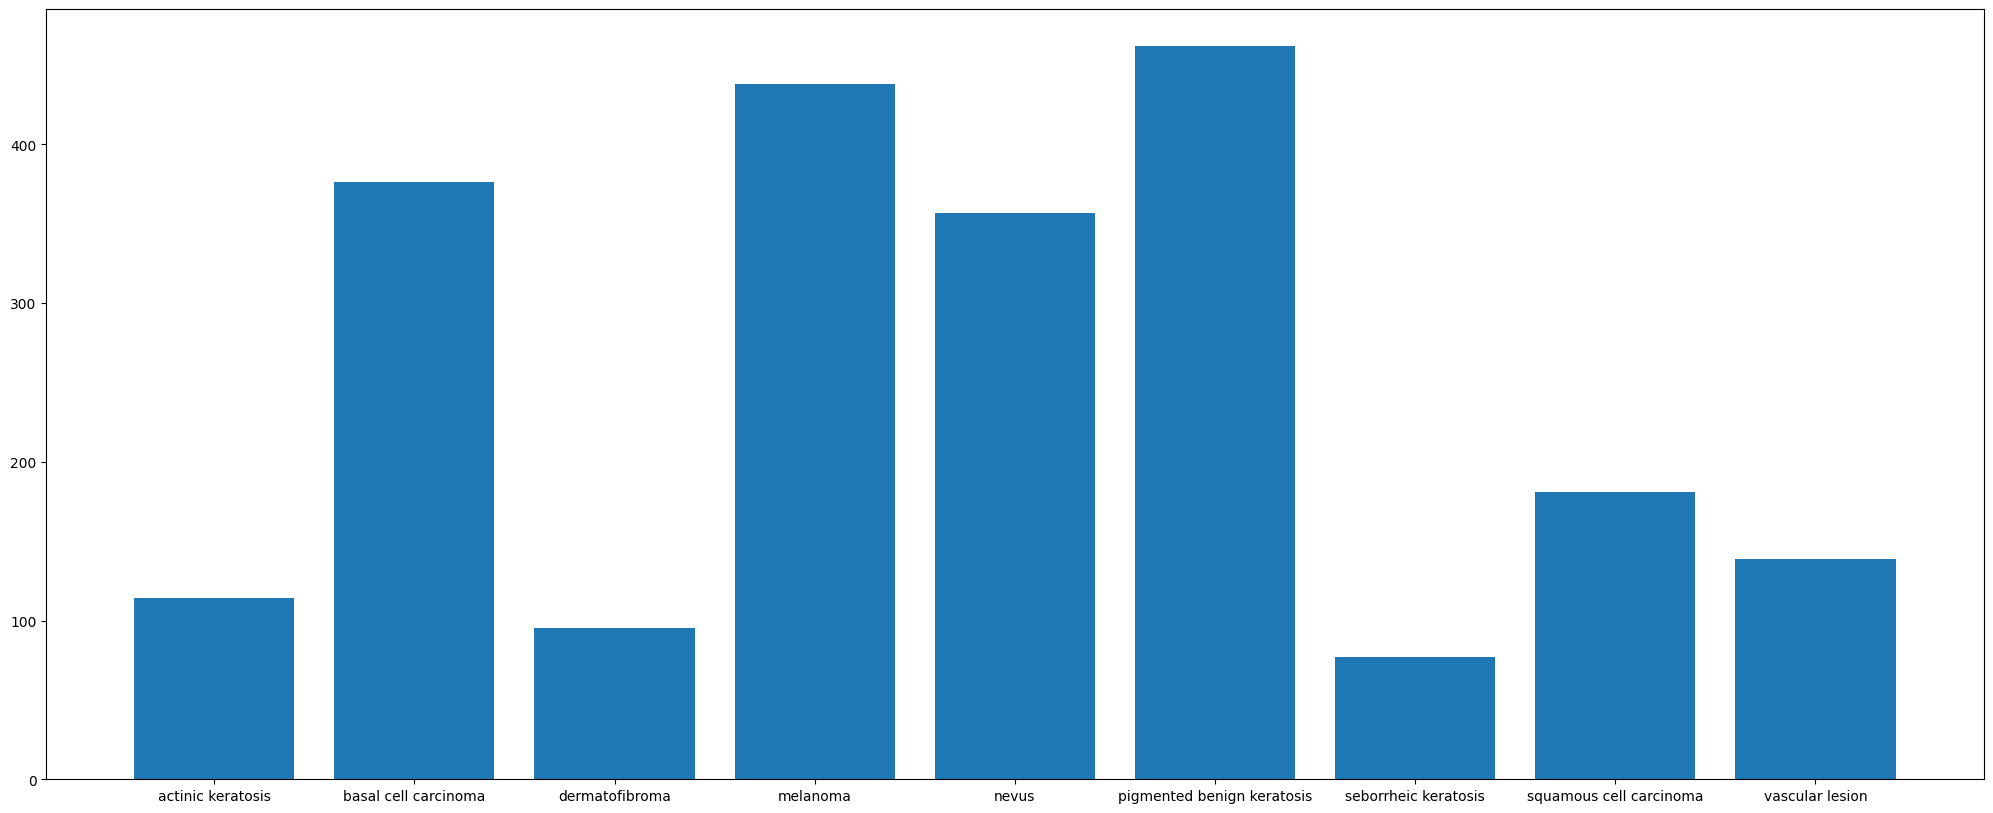

In [61]:
class_count = [len(list(data_dir_train.glob(i+'/*.jpg'))) for i in class_names]
plt.figure(figsize=(25,10))
plt.bar(class_names, class_count)

**Todo:** Write your findings here:

**Which class has the least number of samples?**

seborrheic keratosis

-**Which classes dominate the data in terms proportionate number of samples?**

* pigmented benign
* melanoma
* basal cell carcinoma
* nevus

**Todo:** Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [62]:
!pip install Augmentor

In [63]:
path_to_training_dataset="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability = 0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79C30E009BD0>: 100%|██████████| 500/500 [00:25<00:00, 19.48 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79C2FC0CAF20>: 100%|██████████| 500/500 [00:22<00:00, 22.20 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79C30E021330>: 100%|██████████| 500/500 [00:26<00:00, 19.11 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x79C31CC3DF30>: 100%|██████████| 500/500 [01:44<00:00,  4.79 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x79C2FC101030>: 100%|██████████| 500/500 [01:45<00:00,  4.72 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79C30E0F13F0>: 100%|██████████| 500/500 [00:23<00:00, 21.59 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x79C31CB845E0>: 100%|██████████| 500/500 [00:51<00:00,  9.67 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79C31CB20220>: 100%|██████████| 500/500 [00:23<00:00, 20.90 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x79C2FC059FC0>: 100%|██████████| 500/500 [00:25<00:00, 19.64 Samples/s]


In [64]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


**Lets see the distribution of augmented data after adding new images to the original training data.**

In [65]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0032270.jpg_7dfbfb91-090f-4993-a497-8a6b8754884b.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0027983.jpg_1d4b92ef-08db-4268-97dd-877ae92a6a58.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0032919.jpg_cf9e7778-1b91-40c9-a443-8bfc284aeebe.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0028188.jpg_775cb409-5d36-4c8e-9e7f-041286a5b3ca.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0025606.jpg_87d19db0-e00f-4e74-9a35-b3611236b

In [66]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [67]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [70]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [71]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

**Todo: Train the model on the data created using Augmentor**

In [72]:
batch_size = 32
img_height = 180
img_width = 180

**Todo: Create a training dataset**

In [73]:

data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  seed=123,
                                  validation_split = 0.2,
                                  subset = 'training',
                                  image_size=(img_height, img_width),
                                  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


**Todo: Create a validation dataset**

In [74]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                  data_dir_train,
                                  seed=123,
                                  validation_split = 0.2,
                                  subset = 'validation',
                                  image_size=(img_height, img_width),
                                  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


**Todo: Create your model (make sure to include normalization)**

In [75]:

num_classes = 9
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

**Todo: Compile your model (Choose optimizer and loss function appropriately)**

In [76]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Todo: Train your model**

In [78]:
epochs = 30
## Your code goes here, use 30 epochs.
history30 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 262s 2s/step - loss: 2.0201 - accuracy: 0.2175 - val_loss: 1.7498 - val_accuracy: 0.3727
Epoch 2/30
169/169 [==============================] - 240s 1s/step - loss: 1.7275 - accuracy: 0.3333 - val_loss: 1.5801 - val_accuracy: 0.4321
Epoch 3/30
169/169 [==============================] - 246s 1s/step - loss: 1.5437 - accuracy: 0.4160 - val_loss: 1.3977 - val_accuracy: 0.4907
Epoch 4/30
169/169 [==============================] - 261s 2s/step - loss: 1.4342 - accuracy: 0.4564 - val_loss: 1.4721 - val_accuracy: 0.4529
Epoch 5/30
169/169 [==============================] - 258s 2s/step - loss: 1.3956 - accuracy: 0.4698 - val_loss: 1.3013 - val_accuracy: 0.4915
Epoch 6/30
169/169 [==============================] - 238s 1s/step - loss: 1.3183 - accuracy: 0.4968 - val_loss: 1.3497 - val_accuracy: 0.5011
Epoch 7/30
169/169 [==============================] - 240s 1s/step - loss: 1.3057 - accuracy: 0.4994 - val_loss: 1.1990 - val_accuracy: 0.5442

**Todo: Visualize the model results**

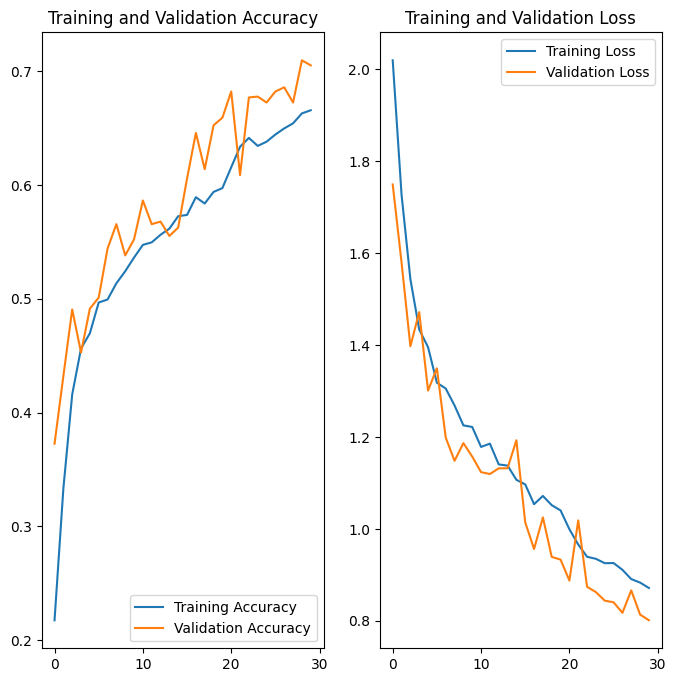

In [79]:
acc = history30.history['accuracy']
val_acc = history30.history['val_accuracy']

loss = history30.history['loss']
val_loss = history30.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?**

Data augmentation, handling of outliers, and class equalization were found to be useful in improving model performance. As a result, the model is well trained for predictions, exhibiting neither overfitting nor underfitting.